In [25]:
import numpy as np
import pandas as pd

import os
from matplotlib import pyplot as plt

import klampt
from klampt.model import ik

world = klampt.WorldModel()
robot_path = "/home/luca/Klampt-examples/data/robots/robonaut2.rob"
robot_record_dir = "robot_records"
num_ik_solutions = 3000
num_subplots = 5
num_ticks = 5

robot_name = robot_path.split("/")[-1].split(".")[0]
world.loadElement(robot_path)

robot = world.robot(0)
robot.randomizeConfig()
lastLink = robot.link(robot.numLinks()-1)
link = lastLink


num_poses = 3000

# Generate random joint configurations and poses for the robot
joint_configs = []
poses = []
for i in range(num_poses):
    robot.randomizeConfig()
    q = robot.getConfig()
    joint_configs.append(q)
    poses.append(lastLink.getWorldPosition([0,0,0]))

# Create a DataFrame with the joint configurations and poses
df = pd.DataFrame(joint_configs, columns=[i for i in range(robot.numLinks())])
# remove columns with std smaller than 1e-4
df = df.loc[:, df.std() > 1e-3]
num_dofs = df.shape[1]
print(f"Number of DOFs: {num_dofs}")
print(f"Active DOFs: {df.columns}")
active_joints = df.columns.to_numpy(dtype=np.int16)
# print active_joints and the corresponding joint names
for i in active_joints:
    print(f"{i}: {robot.link(int(i)).name}")
    
df.describe()

WorldModel::LoadRobot: /home/luca/Klampt-examples/data/robots/robonaut2.rob
RobParser: Reading robot file /home/luca/Klampt-examples/data/robots/robonaut2.rob...
RobParser:    Parsing robot file, 90 links read...
LoadAssimp: Loaded model /home/luca/Klampt-examples/data/robots/robonaut2/baseplate.off (232 verts, 320 tris)
LoadAssimp: Loaded model /home/luca/Klampt-examples/data/robots/robonaut2/base.off (2052 verts, 3880 tris)
LoadAssimp: Loaded model /home/luca/Klampt-examples/data/robots/robonaut2/waist_center.off (7552 verts, 15072 tris)
LoadAssimp: Loaded model /home/luca/Klampt-examples/data/robots/robonaut2/backpack.off (7108 verts, 14212 tris)
LoadAssimp: Loaded model /home/luca/Klampt-examples/data/robots/robonaut2/body_cover.off (737 verts, 1388 tris)
LoadAssimp: Loaded model /home/luca/Klampt-examples/data/robots/robonaut2/left_shoulder_roll.off (577 verts, 1150 tris)
LoadAssimp: Loaded model /home/luca/Klampt-examples/data/robots/robonaut2/left_shoulder_pitch.off (251 verts, 

,4,9,10,11,12,13,14,15,17,18,...,63,64,65,67,69,70,71,73,74,75
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,-0.010849,-0.010637,-0.733714,-2.848137,-1.442998,1.577450,0.008449,0.000301,-0.003998,0.796516,...,1.482918,1.489447,1.474056,0.619788,0.697544,0.605115,0.511171,-0.267902,-0.019746,-0.264899
std,1.802484,0.904170,0.527219,1.638883,0.836613,1.675617,0.708743,0.453466,0.201109,0.447087,...,0.850960,0.857241,0.854586,0.353203,0.401792,0.352182,0.602752,0.252629,0.698341,0.251953
min,-3.136404,-1.569519,-1.659079,-5.679612,-2.876391,-1.299636,-1.219667,-0.783390,-0.349039,0.000196,...,0.000731,0.000677,0.001472,0.000254,0.001472,0.000631,-0.521899,-0.699896,-1.219873,-0.699964
25%,-1.592321,-0.794404,-1.183027,-4.297499,-2.190715,0.127939,-0.604320,-0.396236,-0.176911,0.412962,...,0.743549,0.751848,0.738079,0.314624,0.349794,0.297879,-0.021879,-0.488024,-0.609534,-0.482141
50%,-0.012626,-0.012232,-0.729718,-2.818158,-1.462285,1.543882,0.011785,-0.000791,-0.009185,0.810847,...,1.476196,1.482752,1.440434,0.632139,0.713717,0.607371,0.534665,-0.262120,-0.016503,-0.267788
75%,1.537668,0.760147,-0.276082,-1.438882,-0.706368,3.041240,0.630016,0.387606,0.172422,1.181704,...,2.211504,2.231699,2.212249,0.917217,1.041916,0.908122,1.020613,-0.054319,0.572085,-0.041939
max,3.138750,1.568738,0.174171,-0.000017,-0.000012,4.449688,1.219624,0.784239,0.349058,1.569818,...,2.966045,2.965327,2.966362,1.220750,1.396011,1.221416,1.569037,0.174999,1.218733,0.174991


In [2]:

robot_name = robot_path.split("/")[-1].split(".")[0]
world.loadElement(robot_path)

robot = world.robot(0)
robot.randomizeConfig()
lastLink = robot.link(robot.numLinks()-1)
link = lastLink
print(robot.getConfig())
R = link.getTransform()[0]
t = link.getTransform()[1]
obj = ik.objective(link, R=R, t=t)


ik_solutions = np.zeros((num_ik_solutions, robot.numLinks()))

i = 0
while i < num_ik_solutions:
    solved = ik.solve_global(
        obj,
        iters=1000,
        tol=1e-3,
        activeDofs=None,
        numRestarts=100,
        feasibilityCheck=None,
        startRandom=True,
    )
    if solved:
        ik_solutions[i] = robot.getConfig()
        i += 1
        
df = pd.DataFrame(ik_solutions)

# remove columns with std smaller than 1e-4
df = df.loc[:, df.std() > 1e-4]
num_dofs = df.shape[1]
print(f"Number of DOFs: {num_dofs}")
print(f"Active DOFs: {df.columns}")
active_joints = df.columns.to_numpy()
df.describe()

WorldModel::LoadRobot: /home/luca/Klampt-examples/data/robots/atlas.rob
[0.0, 0.0, 0.0, 0.0, 0.0, 0.4638292503953093, 0.26547817759579195, -0.8488256627176076, 0.1691839001279366, -1.8994876552312578, -0.6332093502573247, 0.43112534931518853, 1.8947932265420924, -1.0787143015636662, 0.36869539925209033, -0.38433848847115576, 0.0, 0.0, 0.0, 0.6836658661801259, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.959276582199976, -1.059656288844308, 1.611423280936914, -0.3790821437396259, 0.3539143540155676, -0.9768645432814325, 0.0, 0.610826310846408, 0.03593713841444679, -0.6275922875830868, 2.3832988085147453, -0.4325581785079829, 0.23662391247629372, -0.37095233034852515, 0.24796685200555568, -0.8368812564773864, 2.1842471574126967, -0.4472630358837839, -0.1286563211850153]
RobParser: Reading robot file /home/luca/Klampt-examples/data/robots/atlas.rob...
RobParser:    Parsing robot file, 46 links read...
LoadAssimp: Loaded model /home/luca/Klampt-examples/data/robots/atlas/meshes/pelvis.off (1109 ve

,0,1,2,3,4,5,40,41,42,43,44,45
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.024613,0.014133,0.119968,0.062062,-6.616572,0.151846,-0.396231,0.123850,-0.580864,1.319719,0.033609,0.140049
std,0.304859,0.129068,0.252473,0.562708,6.962555,0.296540,0.335343,0.250917,0.588753,0.639357,0.474839,0.259445
min,-0.485422,-0.501345,-0.779923,-1.917854,-20.989346,-1.288349,-1.140000,-0.495000,-1.745000,0.000000,-0.900000,-0.436000
25%,-0.204666,-0.053426,0.024012,-0.035488,-9.457551,0.078213,-0.643322,-0.016467,-1.050662,0.837561,-0.296559,-0.016911
50%,-0.030486,0.029692,0.170296,0.209370,-5.982750,0.218235,-0.396936,0.149369,-0.588887,1.349230,0.072246,0.185952
75%,0.186312,0.096613,0.300553,0.408658,-0.339754,0.335236,-0.155380,0.322068,-0.105313,1.842525,0.426578,0.369372
max,0.850540,0.427659,0.493367,1.010115,1.077598,1.193340,0.320000,0.470000,0.524000,2.450000,0.698000,0.436000


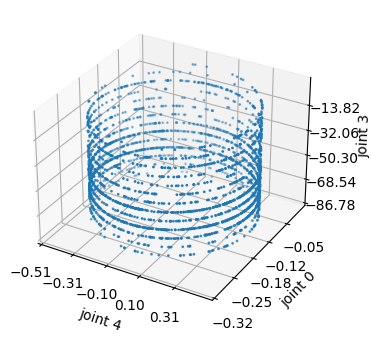

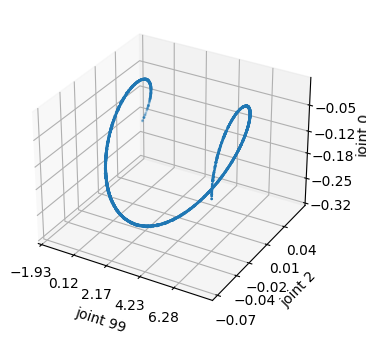

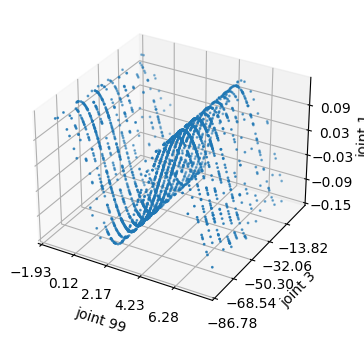

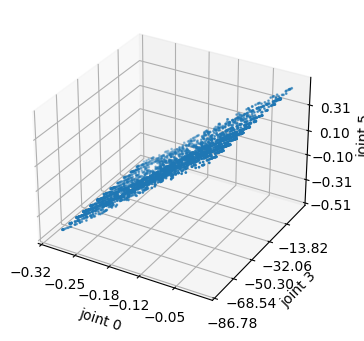

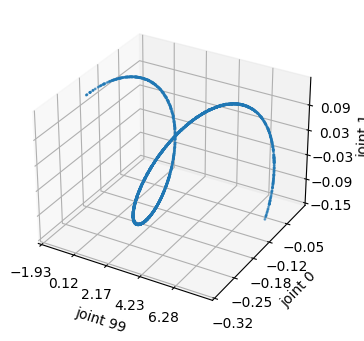

In [3]:
# generate num_subplots times random joint idx at once
subplot_columns = np.array([np.random.choice(df.columns, 3, replace=False) for _ in range(num_subplots)])

def scatter_3d(df, robot_name, num_subplots, subplot_columns):
    # generate 3 times random visualization
    for i in range(num_subplots):
        fig = plt.figure(figsize=(4, 5))
        
        # random pick up 3 columns and sort them 
        columns = subplot_columns[i]

        ax = fig.add_subplot(projection='3d')

        # plot data points by axis = these 3 columns
        ax.scatter(df[columns[0]], df[columns[1]], df[columns[2]], s=1)

        # set labels
        ax.set_xlabel(f"joint {columns[0]}")
        ax.set_ylabel(f"joint {columns[1]}")
        ax.set_zlabel(f"joint {columns[2]}")
        
        num_digits = 2
        start, end = ax.get_xlim()
        step = (end - start) / num_ticks
        ax.xaxis.set_ticks(np.round(np.arange(start, end, step), num_digits))

        start, end = ax.get_ylim()
        step = (end - start) / num_ticks
        ax.yaxis.set_ticks(np.round(np.arange(start, end, step),num_digits))
        
        start, end = ax.get_zlim()
        step = (end - start) / num_ticks
        ax.zaxis.set_ticks(np.round(np.arange(start, end, step), num_digits))
        
        # if not exist, create directory
        if not os.path.exists(f"{robot_record_dir}/{robot_name}"):
            os.makedirs(f"{robot_record_dir}/{robot_name}")
        
        # save figure by robot name and random number
        fig.savefig(f"{robot_record_dir}/{robot_name}/scatter_{i}.png")
    
scatter_3d(df, robot_name, num_subplots, subplot_columns)

In [4]:
from hnne import HNNE

# hnne = HNNE()
# projection = hnne.fit_transform(df.values)
# partitions = np.array(hnne.hierarchy_parameters.partitions)
# partition_sizes = np.array(hnne.hierarchy_parameters.partition_sizes)

# # choose the partition with the size closest to 20
# partition_index = np.argmin(np.abs(partition_sizes - 20))
# partition = partitions[:, partition_index]
# # generate 3 time random visualization with data points colored by partition
# # and assign a color to each partition
# colors = np.random.rand(partition.max() + 1, 3)

def scatter_3d_partition(df, robot_name, num_subplots, partition, subplot_columns, colors):

    for i in range(num_subplots):
        fig = plt.figure(figsize=(4, 5))
        
        columns = subplot_columns[i]

        ax = fig.add_subplot(projection='3d')
        
        for p in partition:
            mask = partition == p
            ax.scatter(
                df.loc[mask, columns[0]],
                df.loc[mask, columns[1]],
                df.loc[mask, columns[2]],
                s=1,
                color=colors[p],
            )

        ax.set_xlabel(f"joint {columns[0]}")
        ax.set_ylabel(f"joint {columns[1]}")
        ax.set_zlabel(f"joint {columns[2]}")
        
        num_digits = 2
        start, end = ax.get_xlim()
        step = (end - start) / num_ticks
        ax.xaxis.set_ticks(np.round(np.arange(start, end, step), num_digits))

        start, end = ax.get_ylim()
        step = (end - start) / num_ticks
        ax.yaxis.set_ticks(np.round(np.arange(start, end, step),num_digits))
        
        start, end = ax.get_zlim()
        step = (end - start) / num_ticks
        ax.zaxis.set_ticks(np.round(np.arange(start, end, step), num_digits))
        
        if not os.path.exists(f"{robot_record_dir}/{robot_name}"):
            os.makedirs(f"{robot_record_dir}/{robot_name}")
        
        fig.savefig(f"{robot_record_dir}/{robot_name}/scatter_{i}_partition.png")

# scatter_3d_partition(df, robot_name, num_subplots, partition, subplot_columns, colors)

In [5]:
from paik.solver import Solver
from paik.settings import (
    PANDA_NSF,
    PANDA_PAIK,
    FETCH_PAIK,
    FETCH_ARM_PAIK,
    IIWA7_PAIK,
    ATLAS_ARM_PAIK,
    ATLAS_WAIST_ARM_PAIK,
    BAXTER_ARM_PAIK,
    PR2_PAIK
)

solver = Solver(solver_param=PANDA_PAIK,
                load_date='best', work_dir='/home/luca/paik')
robot = solver.robot
robot_name = solver.param.robot_name

WorldModel::LoadRobot: /home/luca/Klampt-examples/data/robots/baxter.rob
RobParser: Reading robot file /home/luca/Klampt-examples/data/robots/baxter.rob...
RobParser:    Parsing robot file, 54 links read...
LoadAssimp: Loaded model /home/luca/Klampt-examples/data/robots/baxter/collision_head_link_1.off (482 verts, 960 tris)
LoadAssimp: Loaded model /home/luca/Klampt-examples/data/robots/baxter/collision_head_link_2.off (482 verts, 960 tris)
LoadAssimp: Loaded model /home/luca/Klampt-examples/data/robots/baxter/torso.off (39450 verts, 69139 tris)
ManagedGeometry: loaded /home/luca/Klampt-examples/data/robots/baxter/torso.off in time 0.396911s
LoadAssimp: Loaded model /home/luca/Klampt-examples/data/robots/baxter/head.off (2643 verts, 5215 tris)
LoadAssimp: Loaded model /home/luca/Klampt-examples/data/robots/baxter/screen.off (1904 verts, 3486 tris)
LoadAssimp: Loaded model /home/luca/Klampt-examples/data/robots/baxter/display.off (8 verts, 12 tris)
LoadAssimp: Loaded model /home/luca/Kl

In [6]:
Q, P = robot.sample_joint_angles_and_poses(n=10)


ik_solutions = np.zeros((num_ik_solutions, robot.n_dofs))

i = 0
while i < num_ik_solutions:
    ik_solution = robot.inverse_kinematics_klampt(pose=P[0]) # type: ignore
    if ik_solution.any() != None:
        ik_solutions[i] = ik_solution
        i += 1

df = pd.DataFrame(ik_solutions)
df = df.loc[:, df.std() > 1e-4]

num_dofs = df.shape[1]
print(f"Number of DOFs: {num_dofs}")
df.describe()

Number of DOFs: 7


,0,1,2,3,4,5,6
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,-0.146321,-0.079012,-0.083212,-1.062793,-0.036080,2.925502,0.253383
std,1.613292,0.870120,1.759886,0.291068,2.411888,0.516705,1.647138
min,-2.897300,-1.279708,-2.897300,-1.334687,-2.897300,2.324165,-2.897300
25%,-1.358369,-1.002474,-1.933296,-1.307899,-2.657909,2.366501,-1.079641
50%,0.089120,-0.227784,0.208191,-1.204944,0.061686,2.924664,0.621722
75%,1.535480,0.781478,0.802420,-0.850755,2.634659,3.381419,1.549780
max,2.891451,1.266260,2.897300,-0.293451,2.897300,3.752500,2.897300


In [7]:
# generate num_subplots times random joint idx at once
subplot_columns = np.array([np.random.choice(df.columns, 3, replace=False) for _ in range(num_subplots)])
# scatter_3d(df, robot_name, num_subplots, subplot_columns)

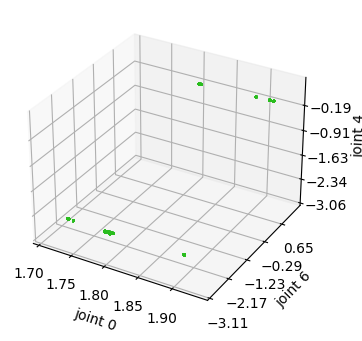

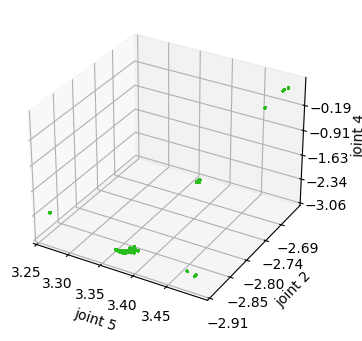

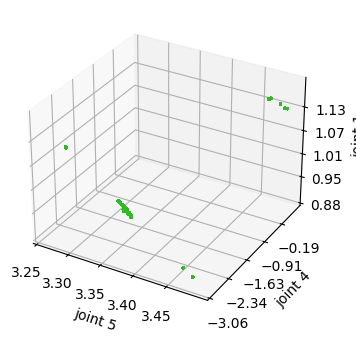

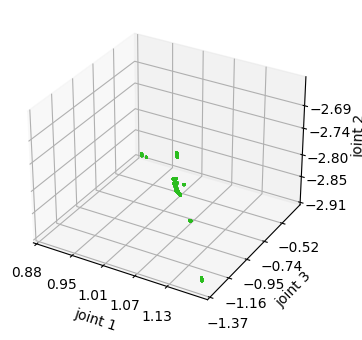

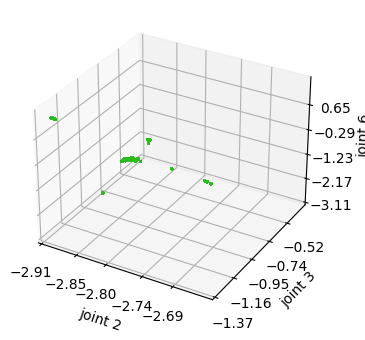

In [8]:
idx = solver.J_knn.kneighbors(df.values, n_neighbors=1, return_distance=False).flatten()
partition = solver.F[idx].flatten()
colors = np.random.rand(partition.max() + 1, 3)

desired_partition_number = np.random.randint(0, partition.max() + 1)
# filter the partition
filter_idx = partition == desired_partition_number
partition = partition[filter_idx]
df = df.loc[filter_idx]
scatter_3d_partition(df, robot_name, num_subplots, partition, subplot_columns, colors)

In [9]:
def paik_solve(solver, pose, num_solutions):
    P = pose.reshape(1, -1, pose.shape[-1])
    P = np.repeat(P, num_solutions, axis=1)
    # shape: (num_poses * num_sols, n)
    F = solver.F[
        solver.P_knn.kneighbors(
            np.atleast_2d(P[:, 0]), n_neighbors=num_solutions, return_distance=False
        ).flatten()
    ]
    # shape: (num_poses * num_sols, n_dofs)
    P = P.reshape(-1, P.shape[-1])
    J_hat = solver.solve_batch(P, F, 1)  # (1, num_poses * num_sols, n)
    J_hat = J_hat.reshape(-1, J_hat.shape[-1])
    return J_hat, F

ik_solutions, partition = paik_solve(solver, P[0], num_ik_solutions)
df = pd.DataFrame(ik_solutions)
df = df.loc[:, df.std() > 1e-4]
num_dofs = df.shape[1]
print(f"Number of DOFs: {num_dofs}")
df.describe()

Number of DOFs: 7


,0,1,2,3,4,5,6
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.100311,-0.086241,-0.310359,-0.879070,0.052587,3.207785,0.222777
std,1.624991,0.921284,1.710059,0.373894,2.068890,0.440008,1.885343
min,-3.060544,-1.293213,-3.371279,-1.347993,-3.751660,2.257512,-5.283480
25%,-1.385490,-0.971930,-2.108533,-1.224124,-2.220940,2.849961,-1.565752
50%,-0.069030,-0.398256,-0.015819,-0.999881,0.413395,3.427903,0.023949
75%,1.799798,0.884313,0.796849,-0.540055,2.168336,3.551500,1.945152
max,3.063052,1.300589,3.506844,0.051867,3.832868,3.896962,4.008682


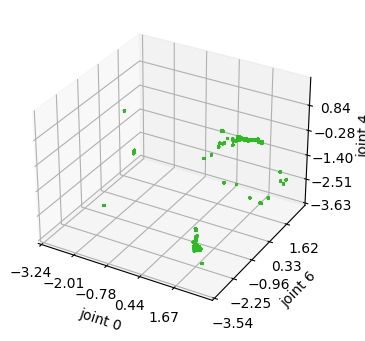

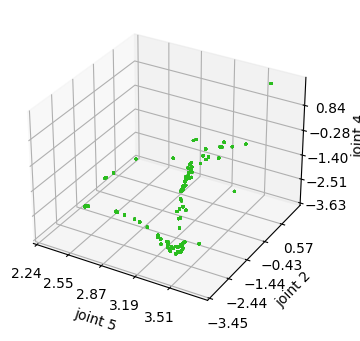

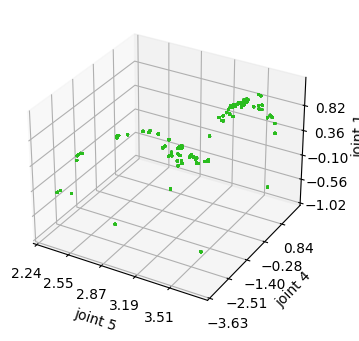

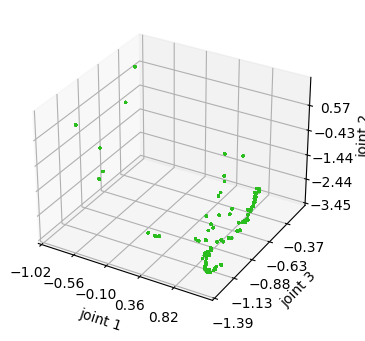

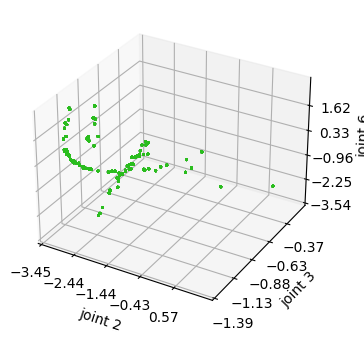

In [10]:
# scatter_3d(df, robot_name, num_subplots, subplot_columns)
# filter the partition
filter_idx = partition == desired_partition_number
partition = partition[filter_idx]
df = df.loc[filter_idx]
scatter_3d_partition(df, robot_name, num_subplots, partition, subplot_columns, colors)